#  Case Study : News

### Categorization
- National
- International 
- Sports
- Media
- Travel & Lifestyle
- Stock Market
- Politics
- Finance



web are rapidly growing in the era of information age where each new site hase its own different layout and categorization for grouping news 
- these heterogeneity of layout and categorization cannot always satisfy individual users need so remove these heterogeneity and classifying the news articles according to the user preference is a formidable task companies use web crawler to extract useful text from HTML pages , the news articles 
- we remove the less significant words which are the stop words from the document or articles and then we apply the name by his classifier for calssifying news contents based on the news code 

# 1. Case Study

- Question: What were the top Australian news topics over the last decade, 
- what can these say about the national conversation?

https://www.youtube.com/watch?v=l3dZ6ZNFjo0


# Methodology ??


# 2. Collect / Load Data



In [61]:
file_path = "abcnews-date-text.csv"

# load the .csv dataset
news = pd.read_csv(file_path)

# take a look at the dataset
news

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers
...,...,...
1186013,20191231,vision of flames approaching corryong in victoria
1186014,20191231,wa police and government backflip on drug amne...
1186015,20191231,we have fears for their safety: victorian premier
1186016,20191231,when do the 20s start


In [62]:
# the dimensions of dataset
dimensions = news.shape

print( 'General size of the dataset: ' + str( dimensions ))

# extract the number of rows and columns
num_rows = dimensions[0]
num_col  = dimensions[1]
print('The dataset has ' + str( num_rows ) + ' rows and ' + str( num_col ) + ' columns!' )

General size of the dataset: (1186018, 2)
The dataset has 1186018 rows and 2 columns!


**QUESTION:** 
- Q1: What do the **rows** and **columns** of this dataset **represent**?
- Q2: What is this dataset about?
- Q3: What are the main problems with this dataset? 
- Q4: Is the data relevant to our initial question (our Business concern)?

**Answer:**

Q1:
-  In **columns**, we have publish_date and heading_text.
            - publish_date represent date of publishing for the article in yyyyMMdd format
            - heading text represent text of the headline in Ascii , English , lowercase, which is unstructured in nature
- In **rows**, we have date of publishing the article and the text of article


Q2: The dataset includes all of articles from ABC news website from early-2003 to last date of 2019 with focus on Australia.

Q3: Dataset containts unstructured data which needs to be structured for a better analysis.

Q4: Yes, the data is relevant because the initial question is asking about top Australain news over the last decade, and we have about 17 years data , 
that 10 last years which is 2009 to 2019 can answer our question, and also we have headlines of articles which lead us to gain the top news. 


# We are dealing with **unstructure** data. ???

# 3. Data Cleaning

In [63]:
len(news['headline_text'].unique())
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186018 entries, 0 to 1186017
Data columns (total 2 columns):
publish_date     1186018 non-null int64
headline_text    1186018 non-null object
dtypes: int64(1), object(1)
memory usage: 18.1+ MB


In [64]:
# demonstrate numbers of articles in each day
news.publish_date.value_counts()

20120824    384
20130412    383
20110222    380
20120814    379
20130514    378
           ... 
20060902     19
20150110     19
20150118     19
20150117     18
20170209      1
Name: publish_date, Length: 6152, dtype: int64

### Date Cleaning

In [65]:

news["year"] = news["publish_date"].astype(str).str[:4].astype(np.int64)
news["month"] = news["publish_date"].astype(str).str[4:6].astype(np.int64)
news.head()


,publish_date,headline_text,year,month
0,20030219,aba decides against community broadcasting lic...,2003,2
1,20030219,act fire witnesses must be aware of defamation,2003,2
2,20030219,a g calls for infrastructure protection summit,2003,2
3,20030219,air nz staff in aust strike for pay rise,2003,2
4,20030219,air nz strike to affect australian travellers,2003,2


**Question**

???

- In our business concern we are looking for data over decade, so we need data from **2009-2019** 
- As we have all data from 2003 , we need to filter data and just continue our analysis with data over decade which is our business concern.


In [66]:
# Making new dataset and we are using that so on
news_decade = news[news['year'] >= 2009]
news_decade = pd.DataFrame(news_decade)


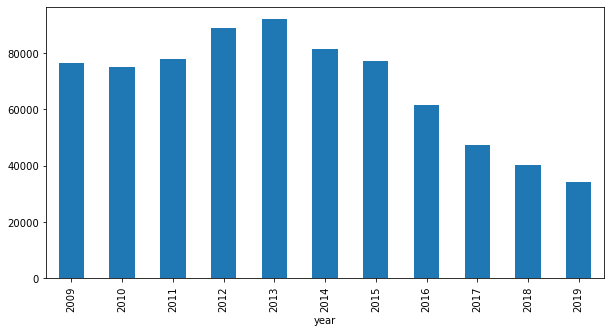

In [67]:
# frequency of articles in whole year in decade
%matplotlib inline
news_decade.groupby(['year']).size().plot(kind='bar', figsize = (10,5))

# we have more news article at 2013 and then 2012 , 

### Text cleaning

**Question**

What kind of text do we have in headline_text?

In [68]:
news_decade['headline_text'].head()

433861    2008 deadliest year for us forces in afghanistan
433862                     2008 dubbed wet year for hunter
433863          2 israelis injured in danish mall shooting
433864           8500 qld homes without power after storms
433865                     about 60 killed in bankgok fire
Name: headline_text, dtype: object

First sight: 
    
- It seems that we have text in headline_text column all in lowercase.
- There is no punctuations in our text. 
- If we have a big data it was safer to check punctuation and capital and lower cases cause it would be imposible to look at all data.
- There are words which are not important to our analysis, I need to remove them, I will do that later on.


**Question**



In [69]:
news_decade["headline_len"] = news_decade["headline_text"].str.len()
news_decade


,publish_date,headline_text,year,month,headline_len
433861,20090101,2008 deadliest year for us forces in afghanistan,2009,1,48
433862,20090101,2008 dubbed wet year for hunter,2009,1,31
433863,20090101,2 israelis injured in danish mall shooting,2009,1,42
433864,20090101,8500 qld homes without power after storms,2009,1,41
433865,20090101,about 60 killed in bankgok fire,2009,1,31
...,...,...,...,...,...
1186013,20191231,vision of flames approaching corryong in victoria,2019,12,49
1186014,20191231,wa police and government backflip on drug amne...,2019,12,54
1186015,20191231,we have fears for their safety: victorian premier,2019,12,49
1186016,20191231,when do the 20s start,2019,12,21



Let's calculate how many words are in our dataset and put in a new column. named **word_count**.

Then, we can check if there is any empty headline. 


In [155]:
# How many words in each headline and what is the mean of numbers of words
# Add a column to datset
news_decade['word_count'] = news_decade['headline_text'].apply(lambda x: len(x.split()))
news_decade[news_decade['word_count'] == 0 ].count()[0]

0

In [157]:
news_decade

,publish_date,headline_text,year,month,headline_len,word_count,headline_str,uniq_wds
433861,20090101,2008 deadliest year for us forces in afghanistan,2009,1,48,8,True,True
433862,20090101,2008 dubbed wet year for hunter,2009,1,31,6,True,True
433863,20090101,2 israelis injured in danish mall shooting,2009,1,42,7,True,True
433864,20090101,8500 qld homes without power after storms,2009,1,41,7,True,True
433865,20090101,about 60 killed in bankgok fire,2009,1,31,6,True,True
...,...,...,...,...,...,...,...,...
1186013,20191231,vision of flames approaching corryong in victoria,2019,12,49,7,True,True
1186014,20191231,wa police and government backflip on drug amne...,2019,12,54,9,True,True
1186015,20191231,we have fears for their safety: victorian premier,2019,12,49,8,True,True
1186016,20191231,when do the 20s start,2019,12,21,5,True,True


Next step, take a look for the longest and shortest articles in our data set.

In [113]:
news_decade['word_count'].max()


15

In [114]:
news_decade['word_count'].min()

1

 We counted all words from headlines included the most common words in English too, though, we don’t want to need *all* words in our count.
    There are lots of common English words like "or", "and", "we", etc. They are called **stopwords** in text processing. We have to use module stopwords from nltk.corpus. It imported at the beginning of the projct.

In [103]:
nltk.download('stopwords') # need to download this package 
stopwords.words('english') # show common words in English

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each


let's remove commom english words from our count. 

To do this we are going to use Python **Counter** which is an unordered collection where elements are stored as Dictionary key and thier count as Dictionary value.

We are used Counter to count each words of our headlines. Then we are able to use **most_common** method to fid out which words were common over last decade which is answering one of the question in business concern. 

In [152]:
from collections import Counter
wd_counts = Counter()
for i, row in news_decade.iterrows():
    wd_counts.update(row['headline_text'].split())


In [ ]:
To remove most common English words I 

In [147]:
from copy import deepcopy

#Add a comment here about why you are creating keys
updated = wd_counts.copy()

keys = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves','he' ,'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it',
 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that',  'these','those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have',
 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between',
  'into','through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when',
 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will',
 'just', 'don',  'should', 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren',  'doesn',   'ma',  'first', 'one', 'two','back','man','day', 'new', 'won','says' ]

list(map(updated.pop, keys))

updated

Counter({'2008': 58,
         'deadliest': 35,
         'year': 4981,
         'us': 9213,
         'forces': 1069,
         'afghanistan': 865,
         'dubbed': 29,
         'wet': 642,
         'hunter': 2427,
         '2': 1384,
         'israelis': 23,
         'injured': 2383,
         'danish': 76,
         'mall': 261,
         'shooting': 2694,
         '8500': 1,
         'qld': 6881,
         'homes': 1267,
         'without': 930,
         'power': 3961,
         'storms': 727,
         '60': 287,
         'killed': 4354,
         'bankgok': 2,
         'fire': 9530,
         'act': 3747,
         'govt': 3185,
         'bodies': 484,
         'forced': 805,
         'comply': 18,
         'human': 1132,
         'rights': 1190,
         'property': 1154,
         'prices': 2385,
         'growth': 1277,
         'predicted': 283,
         'self': 523,
         'seen': 416,
         'cost': 1661,
         'cutting': 300,
         'exercise': 243,
         'alice': 1363,
  

In [153]:
updated.most_common(20)

[('police', 21167),
 ('interview', 14183),
 ('australia', 11456),
 ('court', 10768),
 ('australian', 10169),
 ('nsw', 9773),
 ('fire', 9530),
 ('us', 9213),
 ('council', 8335),
 ('wa', 8211),
 ('sydney', 8197),
 ('government', 8024),
 ('death', 7535),
 ('charged', 7098),
 ('crash', 7029),
 ('rural', 6969),
 ('murder', 6884),
 ('qld', 6881),
 ('health', 6521),
 ('water', 6421)]

result :
- The word **Police**  and **Court** ,**Death** , **Murder** , **Charged**  are the most common words that is being use during decade. They are quite related in context.

- The words **Death** and **Murder** , ****are also in the list of 20 top news.


In [ ]:
Next:
    
    - compare data for half a year and check the frequency 
    

In [ ]:
In 20 top words there nothing about climate change but we know in national conversation these last 2 years, we had lots of news about all of proteted around the world.. 
Also about **refugees** , but there is nothing particulary clear about it.

In this point we are going to analyse more deeply about refugee in australia and 

In [ ]:
def find_cc_wds(content, cc_wds=['climate change','global warming', 'extreme weather', 'greenhouse gas'
                                 'clean energy', 'clean tech', 'renewable energy']
):
    found = False
    for w in cc_wds:
        if w in content:
            found = True
            break

    if not found:
        disj = re.compile(r'(chang\w+\W+(?:\w+\W+){1,5}?climate) | (climate\W+(?:\w+\W+){1,5}?chang)')
        if disj.match(content):
            found = True
    return found

In [ ]:
articles['cc_wds'] = articles['tokenized'].apply(find_cc_wds)
articles['cc_wds'].head()

In [ ]:
def clean_text(article):
    clean1 = re.sub(r'['+string.punctuation + '’—”'+']', "", article.lower())
    return re.sub(r'\W+', ' ', clean1)

# 4. Analysing/visualisation

In [ ]:
# add a map of australia included top news words


In [ ]:
# how many articles per year

news.groupby('year').count()

# how many articles per day
news.groupby('publish_date').count()

# 5.Insights

In [31]:
!pip install nltk

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 1.4 MB 11.9 MB/s eta 0:00:01
     |████████████████████████████████| 679 kB 40.3 MB/s eta 0:00:01
  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434672 sha256=fdcb2f656c23b7af11931139d5f6a3339ec59e58518e4fb8903ce8c64073d32a
  Stored in directory: /home/jovyan/.cache/pip/wheels/45/6c/46/a1865e7ba706b3817f5d1b2ff7ce8996aabdd0d03d47ba0266
Successfully built nltk


In [34]:
#Loading NLTK
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [35]:

from nltk.tokenize import sent_tokenize

tokenized_text=sent_tokenize(news['headline_text'])
print(tokenized_text)

TypeError: expected string or bytes-like object